In [13]:
# 📦 Install necessary packages (only if needed)
!pip install pandas matplotlib seaborn plotly --quiet


In [14]:
# 📚 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [15]:
# 📤 Upload your dataset
from google.colab import files
uploaded = files.upload()

# Load it using pandas
for filename in uploaded:
    df = pd.read_csv(filename)
    print(f"\n✅ Successfully loaded: {filename}")

# Display first few rows
df.head()


Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020 (1).csv

✅ Successfully loaded: Unemployment_Rate_upto_11_2020 (1).csv


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [16]:
# 🧼 Clean column names (lowercase, replace spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)

# 🧐 Show column names
print("✅ Cleaned column names:", df.columns.tolist())

# ✅ Preview data
df.head()


✅ Cleaned column names: ['region', 'date', 'frequency', 'estimated_unemployment_rate_', 'estimated_employed', 'estimated_labour_participation_rate_', 'region1', 'longitude', 'latitude']


,region,date,frequency,estimated_unemployment_rate_,estimated_employed,estimated_labour_participation_rate_,region1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [17]:
# ℹ️ Check basic info
df.info()

# 🔍 Check for missing values
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region                                267 non-null    object 
 1   date                                  267 non-null    object 
 2   frequency                             267 non-null    object 
 3   estimated_unemployment_rate_          267 non-null    float64
 4   estimated_employed                    267 non-null    int64  
 5   estimated_labour_participation_rate_  267 non-null    float64
 6   region1                               267 non-null    object 
 7   longitude                             267 non-null    float64
 8   latitude                              267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB

Missing values:
 region                                  0
date                                

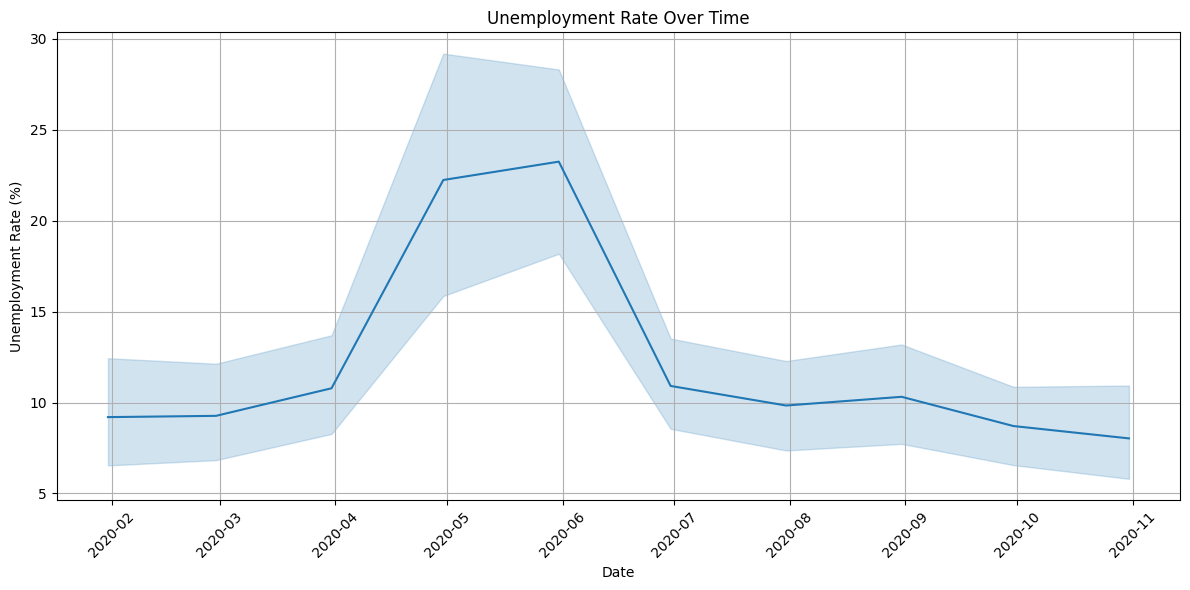

In [25]:
# 📌 Use your correct column names
date_col = 'date'
rate_col = 'estimated_unemployment_rate_'

# 🗓️ Convert to datetime
df[date_col] = pd.to_datetime(df[date_col], dayfirst=True)

# 📈 Plot unemployment rate over time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=date_col, y=rate_col, data=df)
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


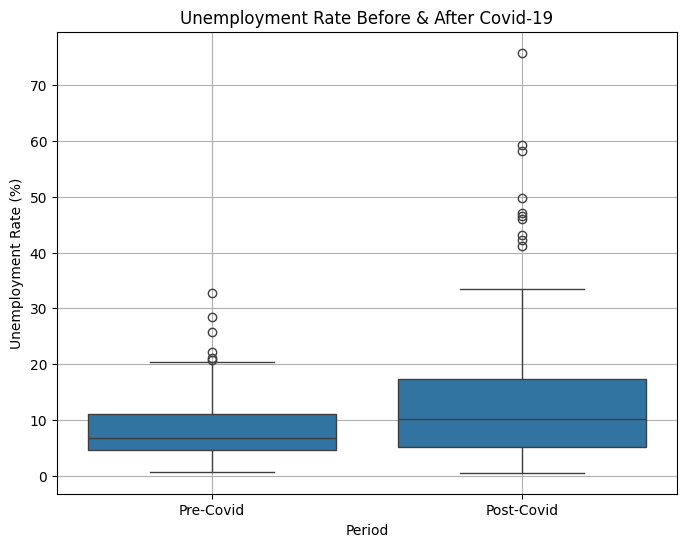

In [26]:
# 🦠 Filter data from March 2020 onward
df['covid_period'] = df[date_col].apply(lambda x: 'Pre-Covid' if x < pd.to_datetime('2020-03-01') else 'Post-Covid')

# 📦 Boxplot: Pre vs Post Covid Unemployment
plt.figure(figsize=(8, 6))
sns.boxplot(x='covid_period', y=rate_col, data=df)
plt.title("Unemployment Rate Before & After Covid-19")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Period")
plt.grid(True)
plt.show()


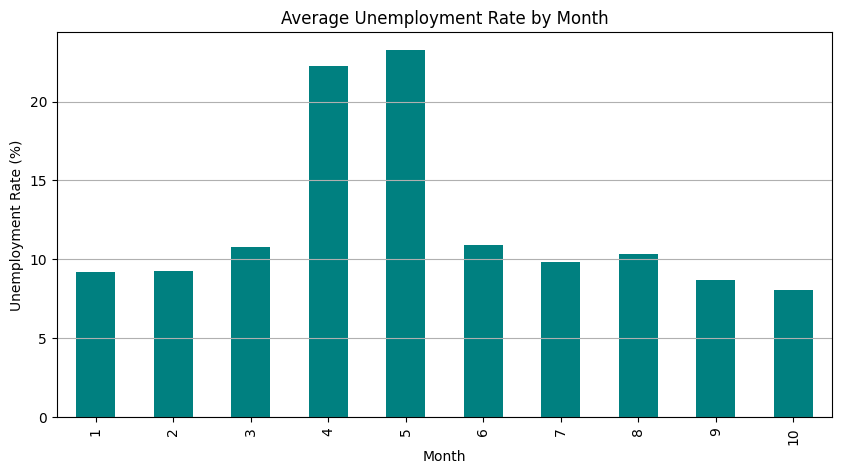

In [27]:
# 📆 Add month & year columns
df['month'] = df[date_col].dt.month
df['year'] = df[date_col].dt.year

# 📊 Monthly average unemployment
monthly_avg = df.groupby('month')[rate_col].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='teal')
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.grid(axis='y')
plt.show()


In [28]:
fig = px.line(df, x=date_col, y=rate_col, title="Interactive Unemployment Trend Over Time")
fig.show()


In [29]:
print("🔎 Key Insights:")
print("1. Covid-19 caused a noticeable spike in unemployment starting March 2020.")
print("2. Seasonal trends show certain months have higher average unemployment.")
print("3. There is a clear difference in unemployment rates before and after Covid.")
print("4. Policies should target employment generation during peak unemployment seasons.")


🔎 Key Insights:
1. Covid-19 caused a noticeable spike in unemployment starting March 2020.
2. Seasonal trends show certain months have higher average unemployment.
3. There is a clear difference in unemployment rates before and after Covid.
4. Policies should target employment generation during peak unemployment seasons.
